In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
plt.style.use("fivethirtyeight")

In [2]:
# Read the data file
data = pd.read_csv('X_train.csv')
data.head()

,Unnamed: 0,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,...,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
0,0,1,60,Tragan,100,23,0.8,3.4,10.0,20,...,3.87,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1
1,1,1,53,Sabha,190,27,0.6,4.2,9.3,11,...,0.12,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4
2,2,1,50,Sabha,150,15,1.1,3.5,8.5,13,...,1.18,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1
3,3,1,36,Obaree-center,80,20,1.0,4.2,8.0,7,...,3.12,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1
4,4,1,30,Obaree-center,80,40,0.8,3.0,9.5,9,...,1.25,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2


In [3]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cols = data.columns.tolist()
for column in cols:
    if data[column].dtype == 'object':
        data[column] = le.fit_transform(data[column])

In [4]:
data=data.drop(["Unnamed: 0"],axis=1)
data


,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
0,1,60,24,100,23,0.8,3.4,10.0,20,10,...,3.87,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1
1,1,53,19,190,27,0.6,4.2,9.3,11,17,...,0.12,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4
2,1,50,19,150,15,1.1,3.5,8.5,13,10,...,1.18,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1
3,1,36,17,80,20,1.0,4.2,8.0,7,13,...,3.12,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1
4,1,30,17,80,40,0.8,3.0,9.5,9,15,...,1.25,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,4,146,28,0.7,4.0,9.5,63,23,...,1.65,3.9,5.23,11.3,288,15,254,138.7,4.35,103.6
2431,1,47,19,90,32,0.8,4.7,8.8,82,23,...,0.32,4.8,4.57,13.2,249,12,254,142.3,4.40,102.7
2432,1,43,19,70,15,0.6,3.5,8.1,22,15,...,1.12,4.4,4.32,11.1,249,8,254,137.8,4.25,110.2
2433,1,60,19,98,29,0.9,4.8,8.2,51,17,...,2.02,4.5,4.41,12.9,293,13,254,147.5,3.15,107.5


In [5]:
# Import libraries
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Check for missing values
#data.isnull().sum()
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2435 entries, 0 to 2434
Data columns (total 22 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Sex        2435 non-null   int64  
 1   Age        2435 non-null   int64  
 2   Adress     2435 non-null   int32  
 3   FBS        2435 non-null   int64  
 4   Urea       2435 non-null   int64  
 5   Creatinin  2435 non-null   float64
 6   ALB        2435 non-null   float64
 7   T_Ca       2435 non-null   float64
 8   GPT        2435 non-null   int64  
 9   GOT        2435 non-null   int64  
 10  ALP        2435 non-null   int64  
 11  CA15       2435 non-null   float64
 12  CEA        2435 non-null   float64
 13  WBC        2435 non-null   float64
 14  RBC        2435 non-null   float64
 15  HGB        2435 non-null   float64
 16  PLT        2435 non-null   int64  
 17  ESR        2435 non-null   int64  
 18  LDH        2435 non-null   int64  
 19  Na         2435 non-null   float64
 20  K       

In [7]:
# Preprocessing data set

X = StandardScaler().fit_transform(data)

# 1. KMeans

In [8]:
# number clustring

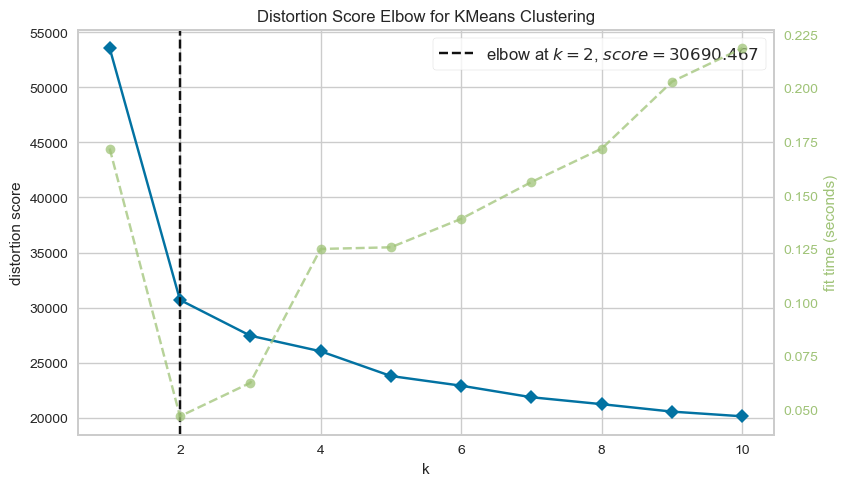

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [9]:
#1. KElbowVisualizer

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

plt.rcParams['figure.figsize'] = 8, 5
visualizer = KElbowVisualizer(KMeans(), k = (1, 11))
visualizer.fit(X)
visualizer.poof()

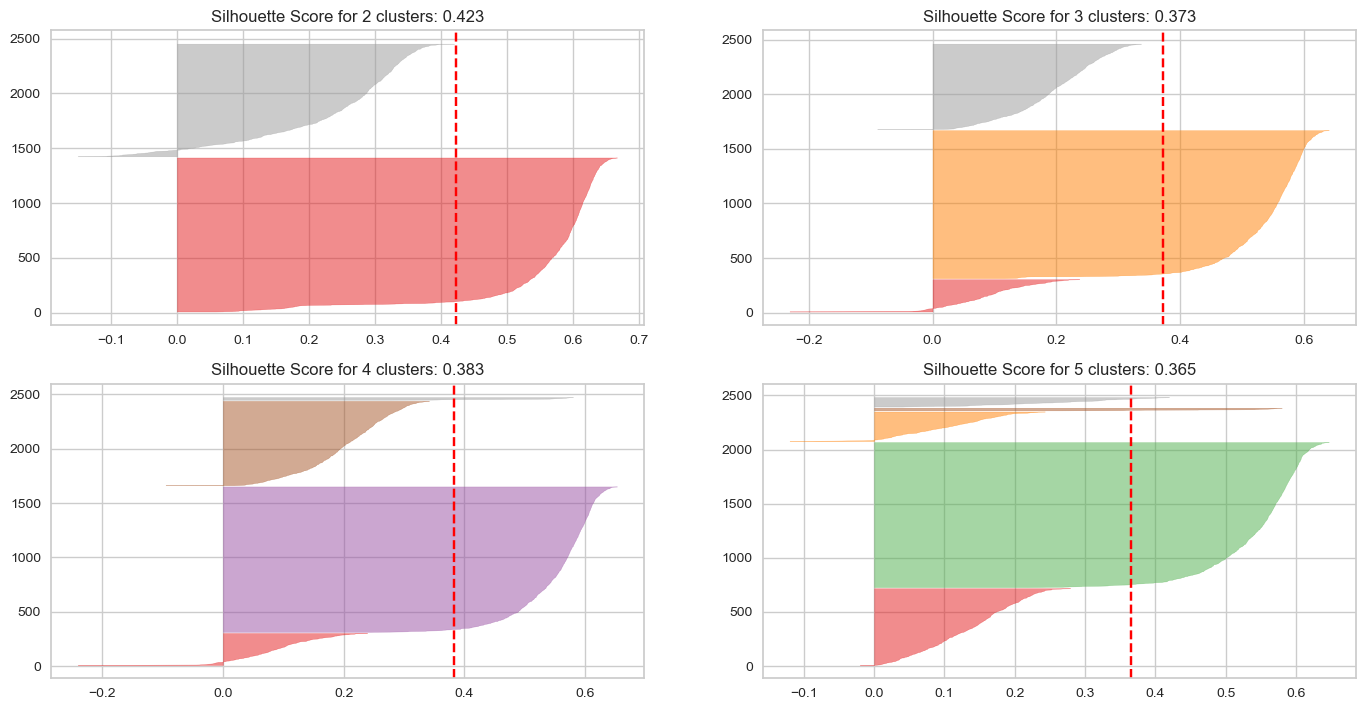

In [10]:
# 2. Silhouette Scores

from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score as sil_score

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,8))
ax = [ax1, ax2, ax3, ax4]

for i in range(2,6):
    modelKM = KMeans(n_clusters = i)
    silViz = SilhouetteVisualizer(modelKM, ax=ax[i-2])
    silViz.fit(X)
    txtx = 'Silhouette Score for ' + str(i) + ' clusters: '+ str(round(sil_score(X, modelKM.labels_), 3))
    ax[i-2].set_title(txtx)

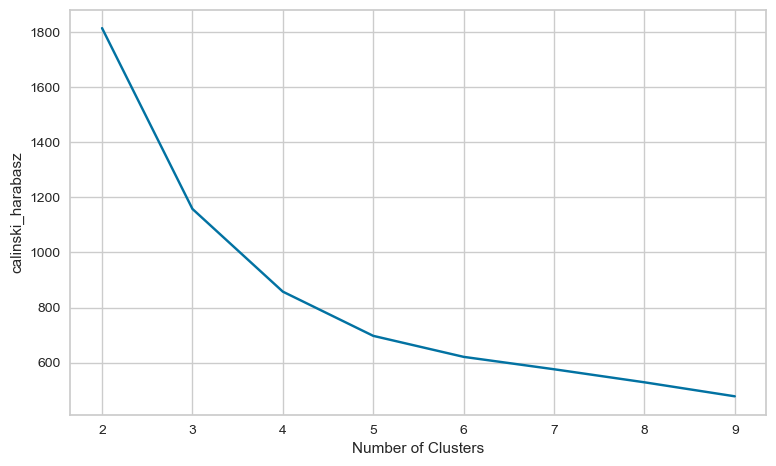

max calinski_harabaz score: 1813.7848264062752


In [11]:
# 3. calinski_harabasz

from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score

calinski_harabaz = []
for k in range (2,10):
    kmeans = KMeans(n_clusters=k,init= "random", random_state = 1)
    kmeans.fit(X)
    metrics.calinski_harabasz_score(X, kmeans.labels_)
    calinski_harabaz.append(metrics.calinski_harabasz_score(X, kmeans.labels_))
    
#plt.style.use("fivethirtyeight")
plt.plot(range(2,10), calinski_harabaz)
plt.xticks(range(2,10))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabasz")
plt.show()

print('max calinski_harabaz score:',max(calinski_harabaz))

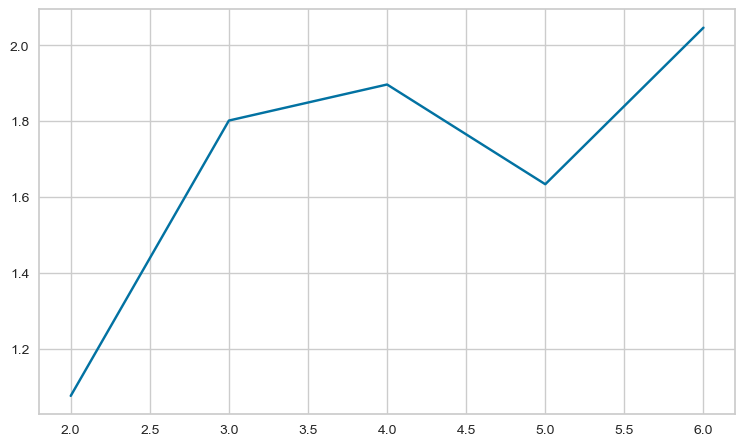

In [12]:
# 4. davies_bouldin_score

from sklearn.metrics import davies_bouldin_score

db = []
for i in range(2,7):
    modelKM = KMeans(n_clusters = i)
    modelKM.fit(X)
    db.append(davies_bouldin_score(X, modelKM.labels_))
plt.plot(range(2,7), db)

In [13]:
#Apply the K-KMeans algorithm
km = KMeans(n_clusters=2, init="k-means++", n_init=10)
#Fit the kmedo function on the scaled data
km.fit(X)

data['KMeansLabels'] = km.predict(X)


In [14]:
#Number of observations in each cluster

data.KMeansLabels.value_counts()

0    1406
1    1029
Name: KMeansLabels, dtype: int64

In [15]:
print('Silhouette Score:', '%.2f'%sil_score(X, data.KMeansLabels))
print('calinski_harabasz_score:', '%.2f'%calinski_harabasz_score(X, data.KMeansLabels))
print('Davies Bouldin Score:', '%.2f'%davies_bouldin_score(X, data.KMeansLabels))

KMeans_calinski_har=calinski_harabasz_score(X, data.KMeansLabels)
KMeans_davies_boul=davies_bouldin_score(X, data.KMeansLabels)
KMeans_sil_score=sil_score(X, data.KMeansLabels)

Silhouette Score: 0.42
calinski_harabasz_score: 1813.78
Davies Bouldin Score: 1.08


In [16]:
modelKM = KMeans(n_clusters = 2)
modelKM.fit(X)
pcaPredKM = pd.Series(modelKM.labels_)
print(pd.concat({
    "count" : pcaPredKM.value_counts(), 
    "Percent" : round(pcaPredKM.value_counts(normalize = True)*100, 2)
}, axis = 1))

   count  Percent
0   1406    57.74
1   1029    42.26


Text(0.5, 1.0, 'Count of each Target Class')

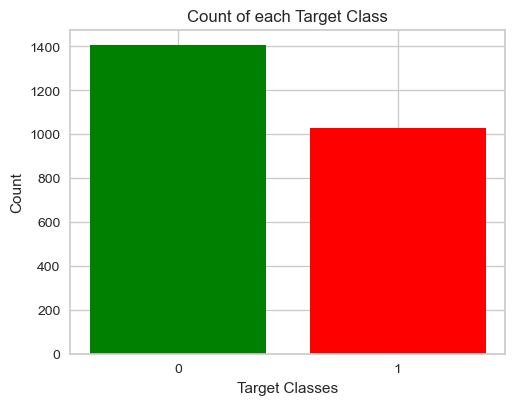

In [17]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 5,4
plt.bar(data['KMeansLabels'].unique(), data['KMeansLabels'].value_counts(), color = ['green', 'red'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [18]:
data

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL,KMeansLabels
0,1,60,24,100,23,0.8,3.4,10.0,20,10,...,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1,0
1,1,53,19,190,27,0.6,4.2,9.3,11,17,...,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4,0
2,1,50,19,150,15,1.1,3.5,8.5,13,10,...,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1,0
3,1,36,17,80,20,1.0,4.2,8.0,7,13,...,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1,0
4,1,30,17,80,40,0.8,3.0,9.5,9,15,...,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,4,146,28,0.7,4.0,9.5,63,23,...,3.9,5.23,11.3,288,15,254,138.7,4.35,103.6,0
2431,1,47,19,90,32,0.8,4.7,8.8,82,23,...,4.8,4.57,13.2,249,12,254,142.3,4.40,102.7,0
2432,1,43,19,70,15,0.6,3.5,8.1,22,15,...,4.4,4.32,11.1,249,8,254,137.8,4.25,110.2,0
2433,1,60,19,98,29,0.9,4.8,8.2,51,17,...,4.5,4.41,12.9,293,13,254,147.5,3.15,107.5,0


In [19]:
X

array([[-0.10185011,  0.93708477,  1.22633589, ..., -0.31719014,
        -0.44393694,  0.01581619],
       [-0.10185011,  0.31880615,  0.49790541, ..., -0.59119992,
        -0.54367734, -0.08645504],
       [-0.10185011,  0.0538296 ,  0.49790541, ..., -0.55340547,
        -0.59505876, -1.00689606],
       ...,
       [-0.10185011, -0.56444903,  0.49790541, ..., -0.65734021,
        -0.51949785,  0.46873161],
       [-0.10185011,  0.93708477,  0.49790541, ..., -0.19908247,
        -0.85196585,  0.07425689],
       [-0.10185011,  1.64368891,  0.49790541, ..., -0.44474641,
        -0.82778636,  0.07425689]])

#  2. K-Medoids

In [20]:
# number clustring

!pip install scikit-learn-extra

!pip install KMedoids

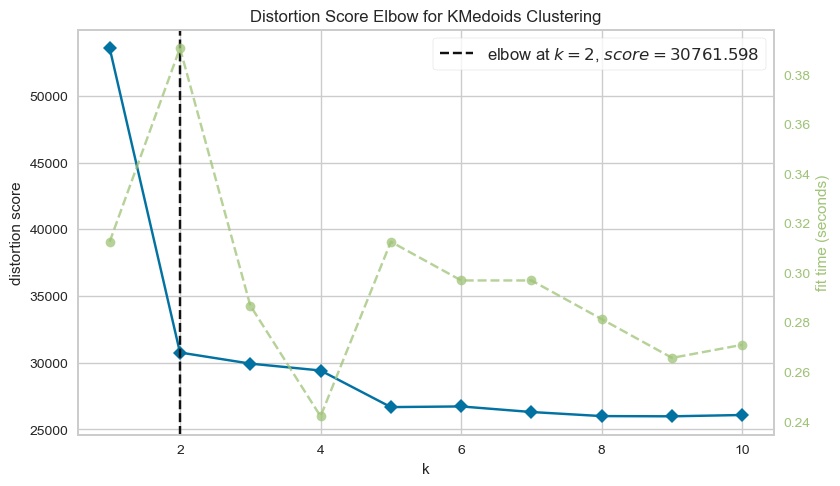

<AxesSubplot:title={'center':'Distortion Score Elbow for KMedoids Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
#1. KElbowVisualizer

from sklearn_extra.cluster import KMedoids
from yellowbrick.cluster import KElbowVisualizer

plt.rcParams['figure.figsize'] = 8, 5
visualizer = KElbowVisualizer(KMedoids(), k = (1, 11))
visualizer.fit(X)
visualizer.poof()

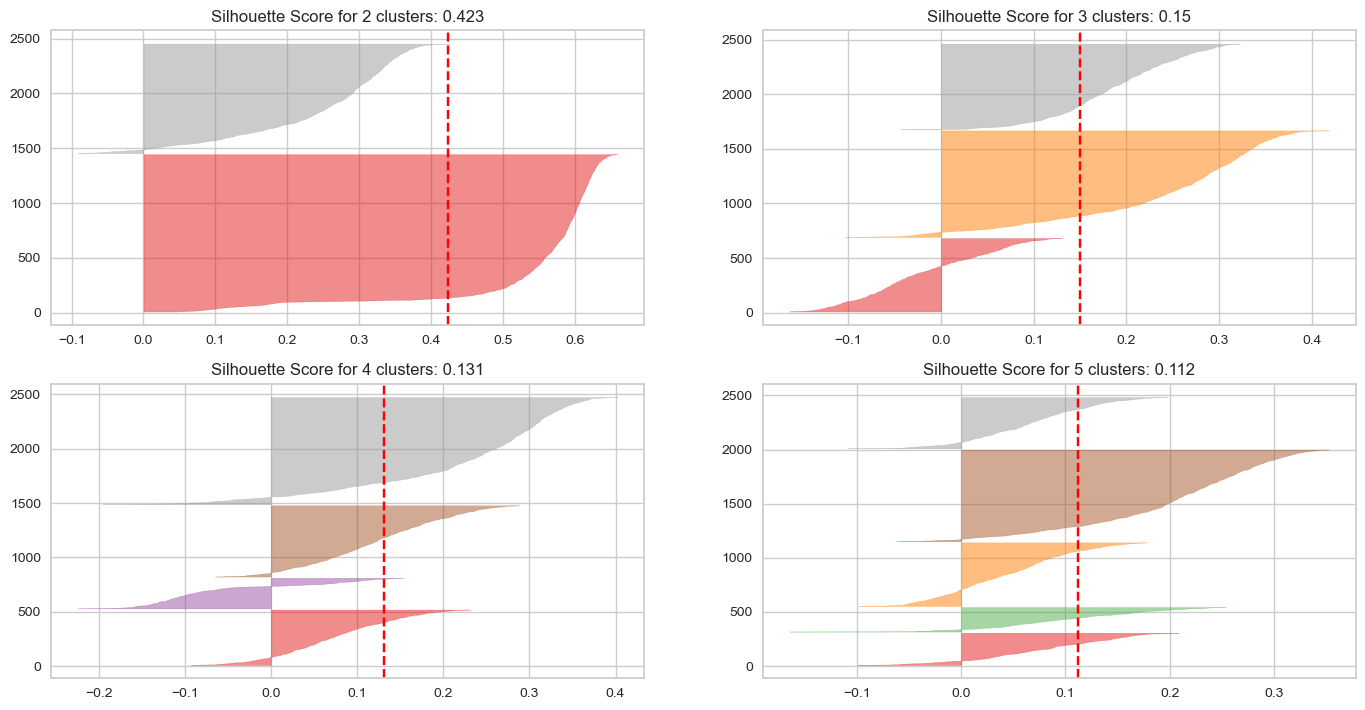

In [22]:
# 2. Silhouette Scores

from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score as sil_score

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize = (15,8))
ax = [ax1, ax2, ax3, ax4]

for i in range(2,6):
    modelKM = KMedoids(n_clusters = i)
    silViz = SilhouetteVisualizer(modelKM, ax=ax[i-2])
    silViz.fit(X)
    txtx = 'Silhouette Score for ' + str(i) + ' clusters: '+ str(round(sil_score(X, modelKM.labels_), 3))
    ax[i-2].set_title(txtx)

In [23]:
#Apply the K-KMeans algorithm
kmedo = KMedoids(n_clusters=2, max_iter=1000, random_state=1)

#Fit the kmedo function on the scaled data
kmedo.fit(X)

data['KMedoids'] = kmedo.predict(X)


In [24]:
#Number of observations in each cluster

data.KMedoids.value_counts()

0    1436
1     999
Name: KMedoids, dtype: int64

In [25]:
print('Silhouette Score:', '%.2f'%sil_score(X, data.KMedoids))
print('calinski_harabasz_score:', '%.2f'%calinski_harabasz_score(X, data.KMedoids))
print('Davies Bouldin Score:', '%.2f'%davies_bouldin_score(X, data.KMedoids))

KMedoids_calinski_har=calinski_harabasz_score(X, data.KMedoids)
KMedoids_davies_boul=davies_bouldin_score(X, data.KMedoids)
KMedoids_sil_score=sil_score(X, data.KMedoids)

Silhouette Score: 0.42
calinski_harabasz_score: 1803.96
Davies Bouldin Score: 1.08


In [26]:
modelKM = KMedoids(n_clusters = 2)
modelKM.fit(X)
pcaPredKM = pd.Series(modelKM.labels_)
print(pd.concat({
    "count" : pcaPredKM.value_counts(), 
    "Percent" : round(pcaPredKM.value_counts(normalize = True)*100, 2)
}, axis = 1))

   count  Percent
0   1436    58.97
1    999    41.03


Text(0.5, 1.0, 'Count of each Target Class')

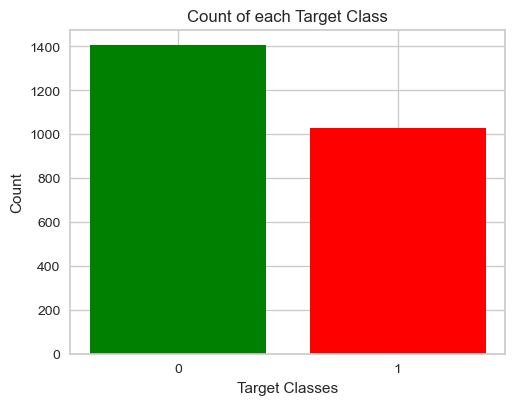

In [27]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 5,4
plt.bar(data['KMeansLabels'].unique(), data['KMeansLabels'].value_counts(), color = ['green', 'red'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [28]:
data

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,RBC,HGB,PLT,ESR,LDH,Na,K,CL,KMeansLabels,KMedoids
0,1,60,24,100,23,0.8,3.4,10.0,20,10,...,4.60,13.4,196,14,150,145.0,4.50,107.1,0,0
1,1,53,19,190,27,0.6,4.2,9.3,11,17,...,5.00,12.5,155,15,260,139.2,4.17,106.4,0,0
2,1,50,19,150,15,1.1,3.5,8.5,13,10,...,4.46,13.8,312,15,169,140.0,4.00,100.1,0,0
3,1,36,17,80,20,1.0,4.2,8.0,7,13,...,4.33,10.7,212,10,138,136.4,4.06,107.1,0,0
4,1,30,17,80,40,0.8,3.0,9.5,9,15,...,4.13,12.3,243,5,154,142.3,4.00,106.2,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,4,146,28,0.7,4.0,9.5,63,23,...,5.23,11.3,288,15,254,138.7,4.35,103.6,0,0
2431,1,47,19,90,32,0.8,4.7,8.8,82,23,...,4.57,13.2,249,12,254,142.3,4.40,102.7,0,0
2432,1,43,19,70,15,0.6,3.5,8.1,22,15,...,4.32,11.1,249,8,254,137.8,4.25,110.2,0,0
2433,1,60,19,98,29,0.9,4.8,8.2,51,17,...,4.41,12.9,293,13,254,147.5,3.15,107.5,0,0


# 3. Hirarchical Clustering

In [29]:
# # number clustring

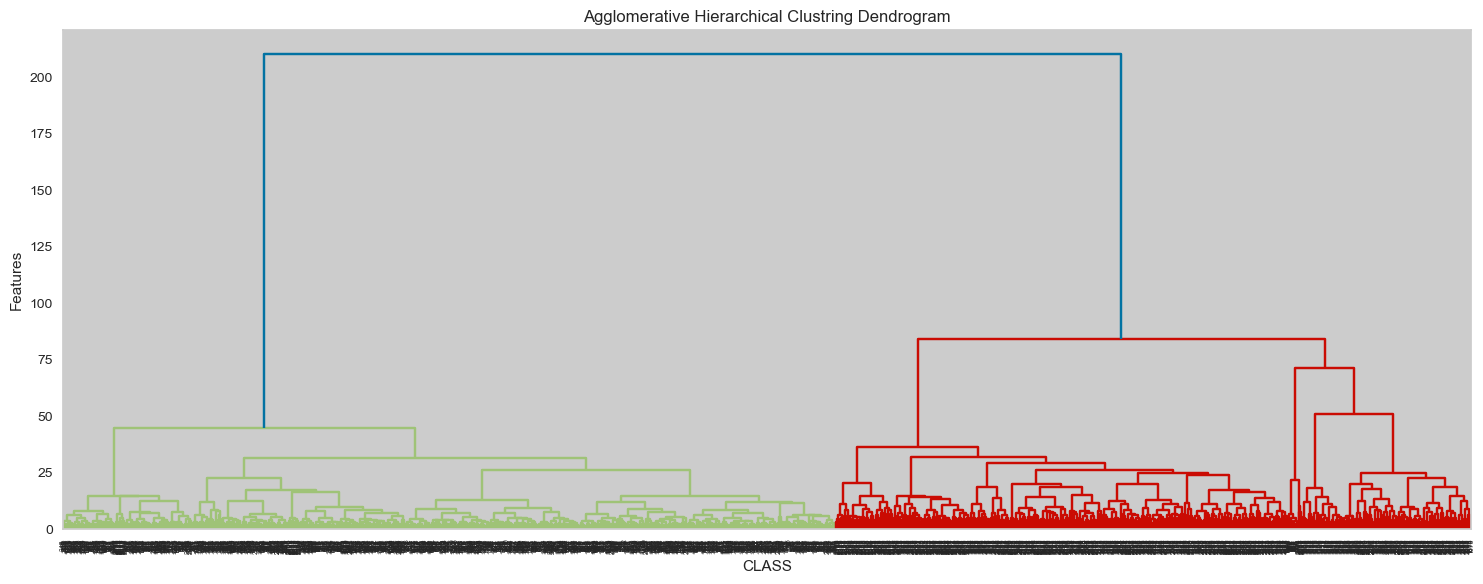

In [30]:
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram
from scipy.spatial.distance import pdist

link = linkage(X, metric = 'euclidean', method = 'ward')
c, coph_dist = cophenet(link, pdist(X))

plt.figure(figsize = (15,6))
plt.title('Agglomerative Hierarchical Clustring Dendrogram')
plt.xlabel('CLASS')
plt.ylabel('Features')
dendrogram(link)
plt.tight_layout()

In [31]:
#Apply the AgglomerativeClustering algorithm

In [32]:
from sklearn.cluster import AgglomerativeClustering as agc

modelAGC = agc(n_clusters = 2, affinity = 'euclidean', linkage = 'ward')
modelAGC.fit(X)
PredAGC = pd.Series(modelAGC.labels_)
print(pd.concat({'count' :PredAGC.value_counts(), 
                 'percent' : round(PredAGC.value_counts(normalize = True)*100, 2)}, 
                axis = 1 ))

   count  percent
1   1337    54.91
0   1098    45.09


In [33]:
data['Agglomerative']=modelAGC.labels_

Text(0.5, 1.0, 'Count of each Target Class')

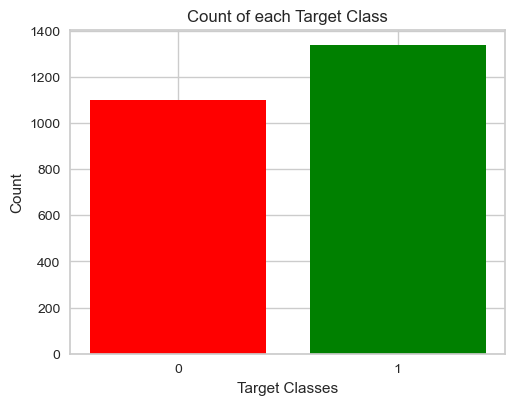

In [34]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 5,4
plt.bar(data['Agglomerative'].unique(), data['Agglomerative'].value_counts(), color = ['green', 'red'])
plt.xticks([0, 1])
plt.xlabel('Target Classes')
plt.ylabel('Count')
plt.title('Count of each Target Class')

In [35]:
print('Silhouette Score:', '%.2f'%sil_score(X, data.Agglomerative))
print('calinski_harabasz_score:', '%.2f'%calinski_harabasz_score(X, data.Agglomerative))
print('Davies Bouldin Score:', '%.2f'%davies_bouldin_score(X, data.Agglomerative))

Agglomerative_calinski_har=calinski_harabasz_score(X, data.Agglomerative)
Agglomerative_davies_boul=davies_bouldin_score(X, data.Agglomerative)
Agglomerative_sil_score=sil_score(X, data.Agglomerative)

Silhouette Score: 0.42
calinski_harabasz_score: 1710.28
Davies Bouldin Score: 1.10


In [36]:
data

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,HGB,PLT,ESR,LDH,Na,K,CL,KMeansLabels,KMedoids,Agglomerative
0,1,60,24,100,23,0.8,3.4,10.0,20,10,...,13.4,196,14,150,145.0,4.50,107.1,0,0,1
1,1,53,19,190,27,0.6,4.2,9.3,11,17,...,12.5,155,15,260,139.2,4.17,106.4,0,0,1
2,1,50,19,150,15,1.1,3.5,8.5,13,10,...,13.8,312,15,169,140.0,4.00,100.1,0,0,1
3,1,36,17,80,20,1.0,4.2,8.0,7,13,...,10.7,212,10,138,136.4,4.06,107.1,0,0,1
4,1,30,17,80,40,0.8,3.0,9.5,9,15,...,12.3,243,5,154,142.3,4.00,106.2,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,4,146,28,0.7,4.0,9.5,63,23,...,11.3,288,15,254,138.7,4.35,103.6,0,0,1
2431,1,47,19,90,32,0.8,4.7,8.8,82,23,...,13.2,249,12,254,142.3,4.40,102.7,0,0,1
2432,1,43,19,70,15,0.6,3.5,8.1,22,15,...,11.1,249,8,254,137.8,4.25,110.2,0,0,1
2433,1,60,19,98,29,0.9,4.8,8.2,51,17,...,12.9,293,13,254,147.5,3.15,107.5,0,0,1


# 4.DBSCAN

In [37]:
## ضبط معاملتها الفائقة

In [38]:
from sklearn.cluster import DBSCAN
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_score 


# finding best hyperparameters

min_samples = np.arange(5,10,1)
Eps=[]
Min_samples=[]
num_clusters = []
silhouette_coefficients = []
best_n_clusters = 2
max_sil = 0 

for i in  range(2,21):
    for j in  np.arange(0.2,5,0.2):
        model_db = DBSCAN(eps=j, min_samples = i, metric='euclidean')
        model_db.fit(X)
        labels = model_db.labels_
        n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)#cluster (-1), is not exactly part of a cluster. They are simply points that do not belong to any clusters and can be "ignored" to some extent.
        num_clusters.append(n_clusters_)
        Min_samples.append(i)
        Eps.append(j)
        if len(np.unique(labels))==1:
            score = 0
        else:
            score = silhouette_score(X,  model_db.labels_)
        silhouette_coefficients.append(score)
        if (score > max_sil) and (n_clusters_>=2):
            max_sil = score
            best_n_clusters = n_clusters_ 
            min_sample = i
            ep = j

In [39]:
# number clustring

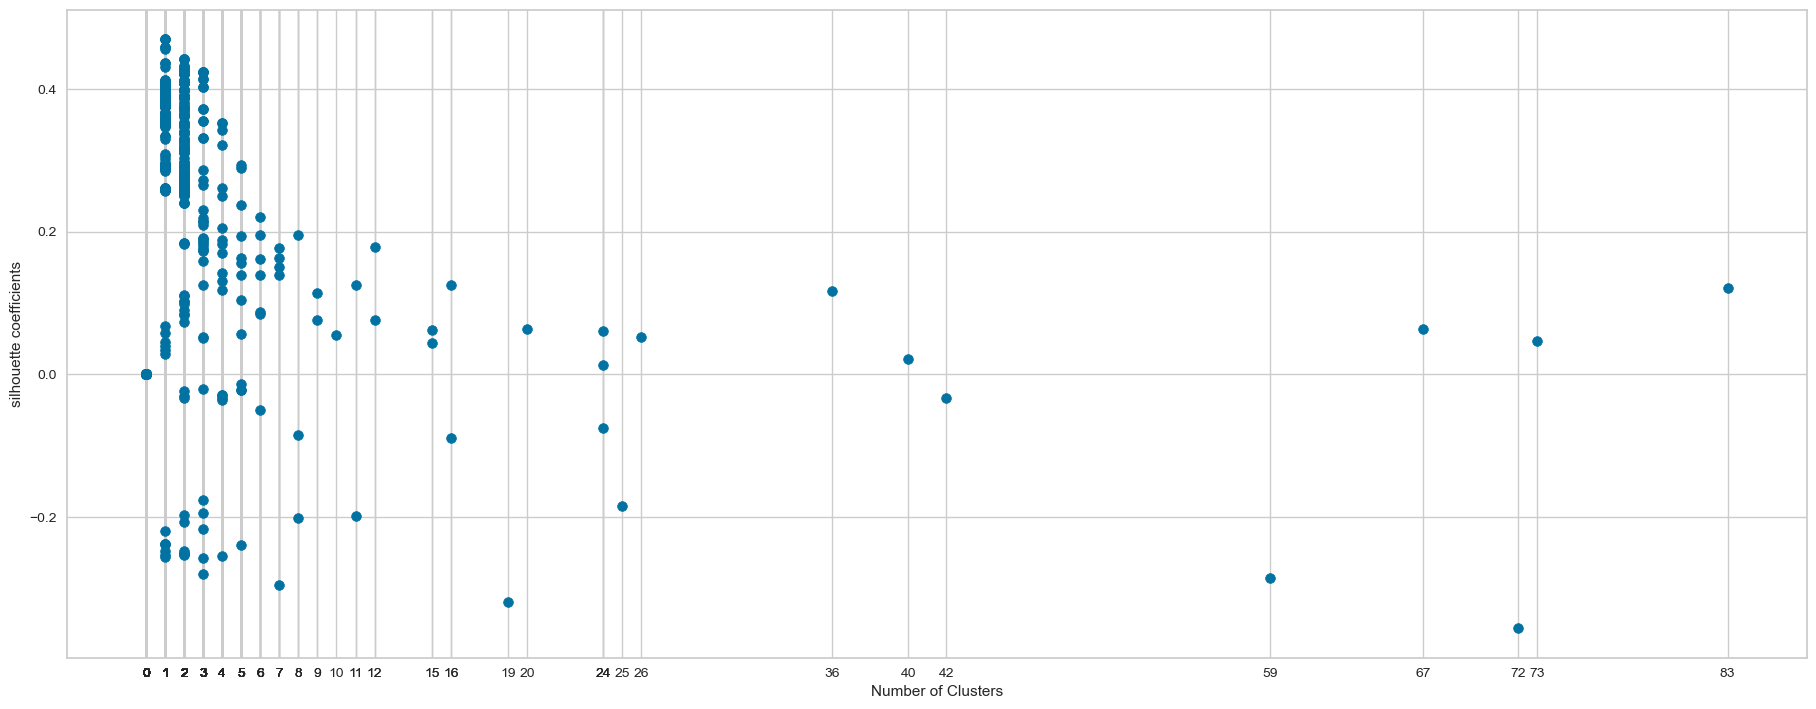

In [40]:
plt.subplots(figsize=(20,8))
plt.style.use("fivethirtyeight")
plt.scatter(num_clusters, silhouette_coefficients)
plt.xticks(num_clusters)
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show() 

In [41]:
print("maximum of silhouette:",max_sil)
print('best_n_clusters:',best_n_clusters)
print('min_samples:',min_sample)
print('best eps:',ep)

maximum of silhouette: 0.4411240077657584
best_n_clusters: 2
min_samples: 6
best eps: 4.800000000000001


In [42]:
from sklearn.cluster import DBSCAN
model_db = DBSCAN(eps=ep, min_samples = min_sample, metric='euclidean')
model_db.fit(X)
labels = model_db.labels_
np.unique(labels)

array([-1,  0,  1], dtype=int64)

In [43]:
from sklearn.cluster import DBSCAN

model_db = DBSCAN(eps=ep, min_samples = min_sample, metric='euclidean')
model_db.fit(X)
PredAdb = pd.Series(model_db.labels_)
print(pd.concat({'count' :PredAdb.value_counts(), 
                 'percent' : round(PredAdb.value_counts(normalize = True)*100, 2)}, 
                axis = 1 ))

    count  percent
 0   2408    98.89
 1     17     0.70
-1     10     0.41


In [44]:
data['DBSCAN']=model_db.labels_

 0    2408
 1      17
-1      10
Name: DBSCAN, dtype: int64


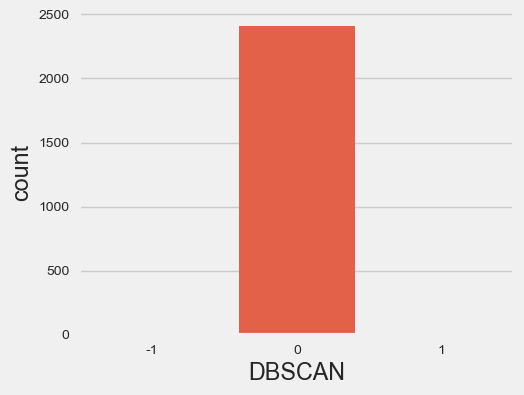

In [45]:
# counting number of clusters
print(data['DBSCAN'].value_counts())
sns.countplot(x=data.DBSCAN)
plt.show()

In [46]:
print('Silhouette Score:', '%.2f'%sil_score(X, data.DBSCAN))
print('calinski_harabasz_score:', '%.2f'%calinski_harabasz_score(X, data.DBSCAN))
print('Davies Bouldin Score:', '%.2f'%davies_bouldin_score(X, data.DBSCAN))

DBSCAN_calinski_har=calinski_harabasz_score(X, data.DBSCAN)
DBSCAN_davies_boul=davies_bouldin_score(X, data.DBSCAN)
DBSCAN_sil_score=sil_score(X, data.DBSCAN)

Silhouette Score: 0.44
calinski_harabasz_score: 62.15
Davies Bouldin Score: 1.10


In [47]:
data

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,PLT,ESR,LDH,Na,K,CL,KMeansLabels,KMedoids,Agglomerative,DBSCAN
0,1,60,24,100,23,0.8,3.4,10.0,20,10,...,196,14,150,145.0,4.50,107.1,0,0,1,0
1,1,53,19,190,27,0.6,4.2,9.3,11,17,...,155,15,260,139.2,4.17,106.4,0,0,1,0
2,1,50,19,150,15,1.1,3.5,8.5,13,10,...,312,15,169,140.0,4.00,100.1,0,0,1,0
3,1,36,17,80,20,1.0,4.2,8.0,7,13,...,212,10,138,136.4,4.06,107.1,0,0,1,0
4,1,30,17,80,40,0.8,3.0,9.5,9,15,...,243,5,154,142.3,4.00,106.2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,4,146,28,0.7,4.0,9.5,63,23,...,288,15,254,138.7,4.35,103.6,0,0,1,0
2431,1,47,19,90,32,0.8,4.7,8.8,82,23,...,249,12,254,142.3,4.40,102.7,0,0,1,0
2432,1,43,19,70,15,0.6,3.5,8.1,22,15,...,249,8,254,137.8,4.25,110.2,0,0,1,0
2433,1,60,19,98,29,0.9,4.8,8.2,51,17,...,293,13,254,147.5,3.15,107.5,0,0,1,0


# 5.Gaussian mixture model

In [48]:
## number clustring

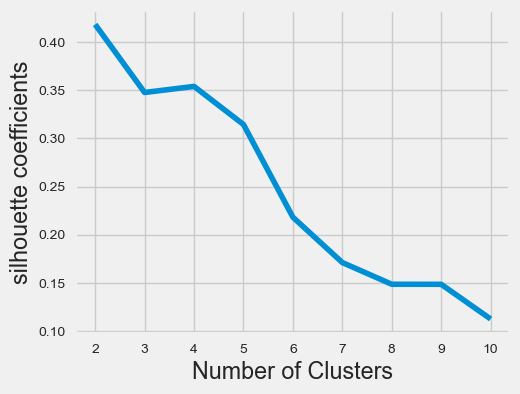

max silhouette score: 0.41839720860702995


In [49]:
from sklearn.mixture import GaussianMixture

sil_gmm = []

for k in range(2,11):#this range is optional
    
    gmm = GaussianMixture(n_components=k, random_state=1 )#each gaussian in your mixture is one component 
    gmm.fit(X)
    
    score = silhouette_score(X, gmm.predict(X),metric='euclidean',random_state=5)
    sil_gmm.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), sil_gmm)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show() 
print('max silhouette score:',max(sil_gmm))

In [50]:
## calinski_harabasz_score

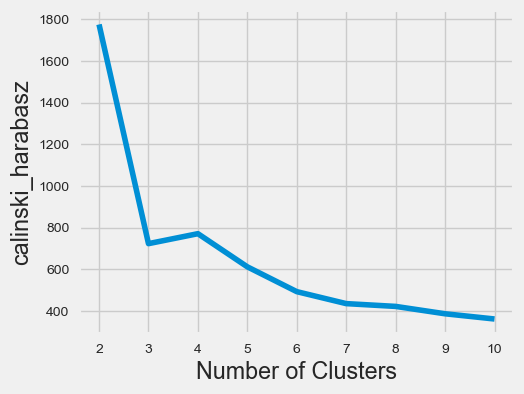

max calinski_harabaz score: 1774.626669091055


In [51]:
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score

calinski_harabaz = []
for k in range (2,11):
    
    gmm = GaussianMixture(n_components=k, random_state=1 )#each gaussian in your mixture is one component
    gmm.fit(X)
    
    metrics.calinski_harabasz_score(X, gmm.predict(X))
    calinski_harabaz.append(metrics.calinski_harabasz_score(X, gmm.predict(X)))
    
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), calinski_harabaz)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabasz")
plt.show()
print('max calinski_harabaz score:',max(calinski_harabaz))

In [52]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=2, random_state=1 )
gmm.fit(X)
data['GaussianMixture'] = gmm.predict(X)


In [53]:
#Number of observations in each cluster

data.GaussianMixture.value_counts()

0    1351
1    1084
Name: GaussianMixture, dtype: int64

0    1351
1    1084
Name: GaussianMixture, dtype: int64


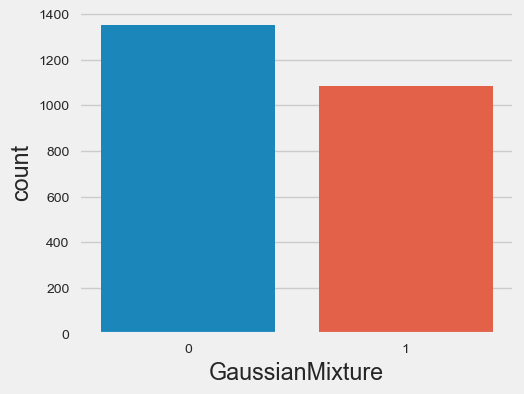

In [54]:
# counting number of clusters
print(data['GaussianMixture'].value_counts())
sns.countplot(x=data.GaussianMixture)
plt.show()

In [55]:
print('Silhouette Score:', '%.2f'%sil_score(X, data.GaussianMixture))
print('calinski_harabasz_score:', '%.2f'%calinski_harabasz_score(X, data.GaussianMixture))
print('Davies Bouldin Score:', '%.2f'%davies_bouldin_score(X, data.GaussianMixture))

GaussianMixture_calinski_har=calinski_harabasz_score(X, data.GaussianMixture)
GaussianMixture_davies_boul=davies_bouldin_score(X, data.GaussianMixture)
GaussianMixture_sil_score=sil_score(X, data.GaussianMixture)

Silhouette Score: 0.42
calinski_harabasz_score: 1774.63
Davies Bouldin Score: 1.08


In [56]:
data

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,ESR,LDH,Na,K,CL,KMeansLabels,KMedoids,Agglomerative,DBSCAN,GaussianMixture
0,1,60,24,100,23,0.8,3.4,10.0,20,10,...,14,150,145.0,4.50,107.1,0,0,1,0,0
1,1,53,19,190,27,0.6,4.2,9.3,11,17,...,15,260,139.2,4.17,106.4,0,0,1,0,0
2,1,50,19,150,15,1.1,3.5,8.5,13,10,...,15,169,140.0,4.00,100.1,0,0,1,0,0
3,1,36,17,80,20,1.0,4.2,8.0,7,13,...,10,138,136.4,4.06,107.1,0,0,1,0,0
4,1,30,17,80,40,0.8,3.0,9.5,9,15,...,5,154,142.3,4.00,106.2,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,4,146,28,0.7,4.0,9.5,63,23,...,15,254,138.7,4.35,103.6,0,0,1,0,0
2431,1,47,19,90,32,0.8,4.7,8.8,82,23,...,12,254,142.3,4.40,102.7,0,0,1,0,0
2432,1,43,19,70,15,0.6,3.5,8.1,22,15,...,8,254,137.8,4.25,110.2,0,0,1,0,0
2433,1,60,19,98,29,0.9,4.8,8.2,51,17,...,13,254,147.5,3.15,107.5,0,0,1,0,0


# 6. MiniBatchKMeans

In [57]:
# number clustring

C:\Users\TOSHIBA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\TOSHIBA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\TOSHIBA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C

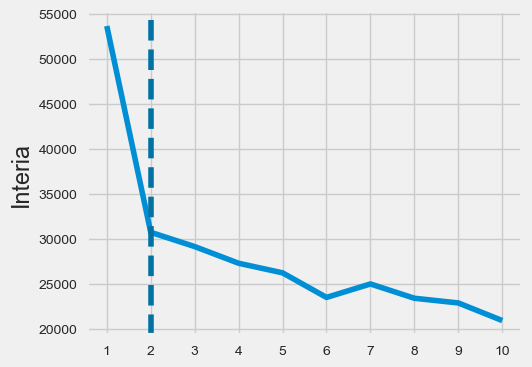

In [58]:
from sklearn.cluster import MiniBatchKMeans

List = []
for k in range(1,11):#this range is optional
    minibatch = MiniBatchKMeans(n_clusters=k , random_state =42, batch_size=50) 
    minibatch.fit(X)
    List.append(minibatch.inertia_)
    
from kneed import KneeLocator
kl = KneeLocator(range(1,11), List, curve='convex', direction='decreasing')
kl.elbow
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),List)
plt.xticks(range(1,11))
plt.ylabel("Interia")
plt.axvline(x=kl.elbow, color='b', label='axvline - full height', ls='--')
plt.show() 

C:\Users\TOSHIBA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\TOSHIBA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\TOSHIBA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C

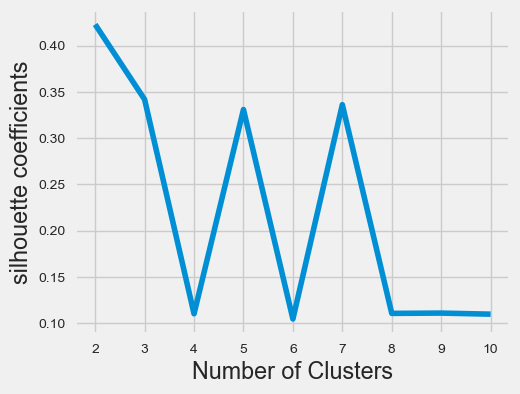

max silhouette score: 0.4229083080291023


In [59]:
# silhouette_score
from sklearn.metrics import silhouette_score

silhouette_coefficients = []
for k in range (2,11):
    minibatch = MiniBatchKMeans(n_clusters=k, random_state =42, batch_size=50) 
    minibatch.fit(X)
    score = silhouette_score(X, minibatch.predict(X))
    silhouette_coefficients.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette coefficients")
plt.show()  
print('max silhouette score:',max(silhouette_coefficients))

C:\Users\TOSHIBA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\TOSHIBA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\TOSHIBA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C

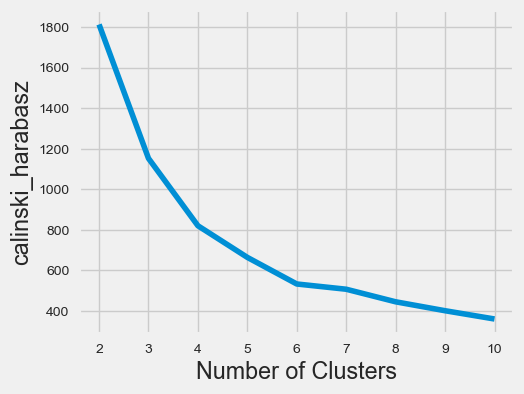

max calinski_harabaz score: 1813.181659111885


In [60]:
#calinski_harabaz

from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score

calinski_harabaz = []
for k in range (2,11):
    minibatch = MiniBatchKMeans(n_clusters=k, init='random' , random_state =42, batch_size=50)
    minibatch.fit(X)
    score = metrics.calinski_harabasz_score(X, minibatch.labels_)
    calinski_harabaz.append(score)
    
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), calinski_harabaz)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabasz")
plt.show()
print('max calinski_harabaz score:',max(calinski_harabaz))

C:\Users\TOSHIBA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\TOSHIBA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C:\Users\TOSHIBA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(
C

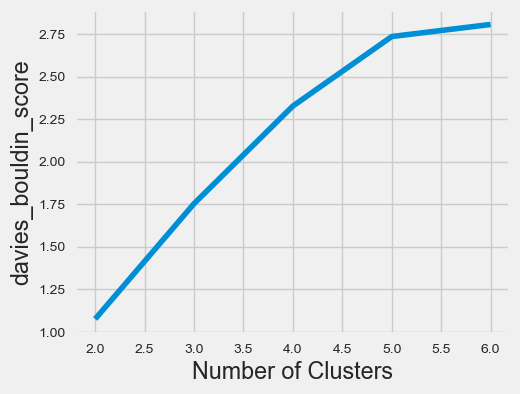

In [61]:
# 4. davies_bouldin_score

from sklearn.metrics import davies_bouldin_score

db = []
for i in range(2,7):
    minibatch = MiniBatchKMeans(n_clusters=i, init='random' , random_state =42, batch_size=50)
    minibatch.fit(X)
    db.append(davies_bouldin_score(X, minibatch.labels_))
plt.xlabel("Number of Clusters")
plt.ylabel("davies_bouldin_score")
plt.plot(range(2,7), db)

In [62]:
from sklearn.mixture import GaussianMixture

minibatch = MiniBatchKMeans(n_clusters=2, init='random' , random_state =42, batch_size=50)
minibatch.fit(X)
data['minibatch'] = minibatch.predict(X)


C:\Users\TOSHIBA\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1848: UserWarning: MiniBatchKMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can prevent it by setting batch_size >= 1024 or by setting the environment variable OMP_NUM_THREADS=1
  warnings.warn(


0    1414
1    1021
Name: minibatch, dtype: int64


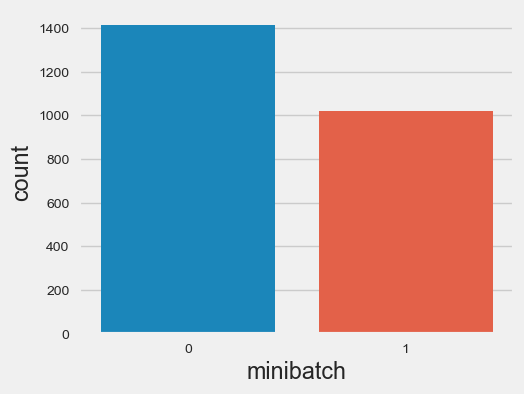

In [63]:
# counting number of clusters
print(data['minibatch'].value_counts())
sns.countplot(x=data.minibatch)
plt.show()

In [64]:
print('Silhouette Score:', '%.2f'%sil_score(X, data.minibatch))
print('calinski_harabasz_score:', '%.2f'%calinski_harabasz_score(X, data.minibatch))
print('Davies Bouldin Score:', '%.2f'%davies_bouldin_score(X, data.minibatch))

minibatch_calinski_har=calinski_harabasz_score(X, data.minibatch)
minibatch_davies_boul=davies_bouldin_score(X, data.minibatch)
minibatch_sil_score=sil_score(X, data.minibatch)

Silhouette Score: 0.42
calinski_harabasz_score: 1813.18
Davies Bouldin Score: 1.08


In [65]:
data

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,LDH,Na,K,CL,KMeansLabels,KMedoids,Agglomerative,DBSCAN,GaussianMixture,minibatch
0,1,60,24,100,23,0.8,3.4,10.0,20,10,...,150,145.0,4.50,107.1,0,0,1,0,0,0
1,1,53,19,190,27,0.6,4.2,9.3,11,17,...,260,139.2,4.17,106.4,0,0,1,0,0,0
2,1,50,19,150,15,1.1,3.5,8.5,13,10,...,169,140.0,4.00,100.1,0,0,1,0,0,0
3,1,36,17,80,20,1.0,4.2,8.0,7,13,...,138,136.4,4.06,107.1,0,0,1,0,0,0
4,1,30,17,80,40,0.8,3.0,9.5,9,15,...,154,142.3,4.00,106.2,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,4,146,28,0.7,4.0,9.5,63,23,...,254,138.7,4.35,103.6,0,0,1,0,0,0
2431,1,47,19,90,32,0.8,4.7,8.8,82,23,...,254,142.3,4.40,102.7,0,0,1,0,0,0
2432,1,43,19,70,15,0.6,3.5,8.1,22,15,...,254,137.8,4.25,110.2,0,0,1,0,0,0
2433,1,60,19,98,29,0.9,4.8,8.2,51,17,...,254,147.5,3.15,107.5,0,0,1,0,0,0


In [66]:
df1 = pd.DataFrame({'models':['kmeans',
                               'KMedoids',
                               'Hierarchical',
                               'dbscan',
                               'gaussian mixture',
                               'MiniBatchKMeans' ,
                               ]
                     
                     ,'calinski_score':[KMeans_calinski_har,
                                      KMedoids_calinski_har,
                                      Agglomerative_calinski_har,
                                      DBSCAN_calinski_har,
                                      GaussianMixture_calinski_har,
                                      minibatch_calinski_har]
                    ,
                    
                   'davies_boul':[KMeans_davies_boul,
                                  KMedoids_davies_boul,
                                  Agglomerative_davies_boul,
                                  DBSCAN_davies_boul,
                                  GaussianMixture_davies_boul,
                                  minibatch_davies_boul ]
                   ,
                    'n_clusters':[2,2,2,3,2,2]
                    ,
                   'sil_score':[KMeans_sil_score,
                               KMedoids_sil_score,
                               Agglomerative_sil_score,
                               DBSCAN_sil_score,
                               GaussianMixture_sil_score,
                               minibatch_sil_score]})
df1

,models,calinski_score,davies_boul,n_clusters,sil_score
0,kmeans,1813.784826,1.075153,2,0.422965
1,KMedoids,1803.964806,1.077609,2,0.422812
2,Hierarchical,1710.284245,1.098891,2,0.416461
3,dbscan,62.148936,1.104349,3,0.441124
4,gaussian mixture,1774.626669,1.083766,2,0.418397
5,MiniBatchKMeans,1813.181659,1.075183,2,0.422995


Text(0, 0.5, 'scores')

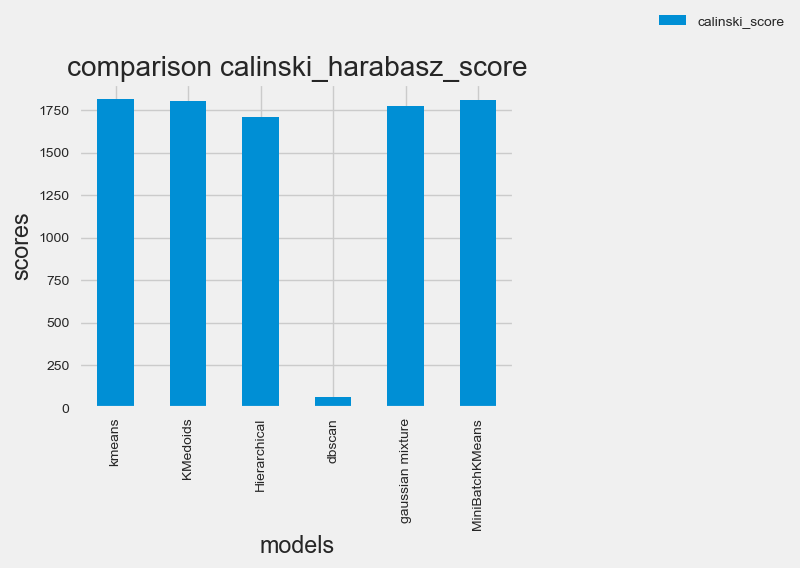

In [67]:
df1.plot( x="models", y=["calinski_score"], kind="bar")
plt.legend(bbox_to_anchor =(1.65, 1.25))
plt.title("comparison calinski_harabasz_score")
plt.xlabel("models")
plt.ylabel("scores")

Text(0, 0.5, 'scores')

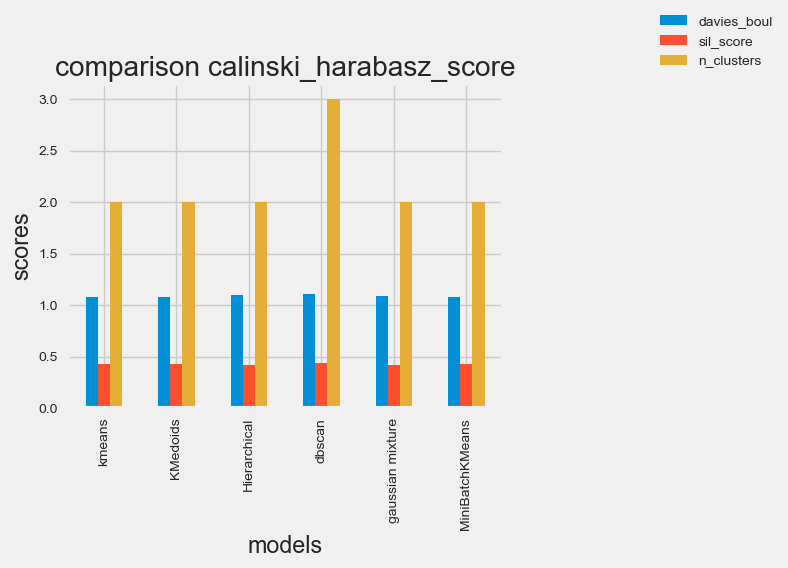

In [68]:
df1.plot( x="models", y=["davies_boul","sil_score","n_clusters"], kind="bar")
plt.legend(bbox_to_anchor =(1.65, 1.25))
plt.title("comparison calinski_harabasz_score")
plt.xlabel("models")
plt.ylabel("scores")

In [69]:
data

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,LDH,Na,K,CL,KMeansLabels,KMedoids,Agglomerative,DBSCAN,GaussianMixture,minibatch
0,1,60,24,100,23,0.8,3.4,10.0,20,10,...,150,145.0,4.50,107.1,0,0,1,0,0,0
1,1,53,19,190,27,0.6,4.2,9.3,11,17,...,260,139.2,4.17,106.4,0,0,1,0,0,0
2,1,50,19,150,15,1.1,3.5,8.5,13,10,...,169,140.0,4.00,100.1,0,0,1,0,0,0
3,1,36,17,80,20,1.0,4.2,8.0,7,13,...,138,136.4,4.06,107.1,0,0,1,0,0,0
4,1,30,17,80,40,0.8,3.0,9.5,9,15,...,154,142.3,4.00,106.2,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,4,146,28,0.7,4.0,9.5,63,23,...,254,138.7,4.35,103.6,0,0,1,0,0,0
2431,1,47,19,90,32,0.8,4.7,8.8,82,23,...,254,142.3,4.40,102.7,0,0,1,0,0,0
2432,1,43,19,70,15,0.6,3.5,8.1,22,15,...,254,137.8,4.25,110.2,0,0,1,0,0,0
2433,1,60,19,98,29,0.9,4.8,8.2,51,17,...,254,147.5,3.15,107.5,0,0,1,0,0,0


In [70]:
data.to_excel('data_train.xlsx',index=True,header=True)

##   Agglomerative  بناء النموذج

In [71]:
BC_Agglomerative=pd.read_excel('Agglomerative.xlsx')

##  تقسيم البيانات

In [72]:

X=BC_Agglomerative.drop(["Agglomerative"],axis=1)
y=BC_Agglomerative["Agglomerative"]  


In [73]:
X

,Unnamed: 0,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,...,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
0,0,1,60,24,100,23,0.8,3.4,10.0,20,...,3.87,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1
1,1,1,53,19,190,27,0.6,4.2,9.3,11,...,0.12,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4
2,2,1,50,19,150,15,1.1,3.5,8.5,13,...,1.18,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1
3,3,1,36,17,80,20,1.0,4.2,8.0,7,...,3.12,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1
4,4,1,30,17,80,40,0.8,3.0,9.5,9,...,1.25,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,2430,1,30,4,146,28,0.7,4.0,9.5,63,...,1.65,3.9,5.23,11.3,288,15,254,138.7,4.35,103.6
2431,2431,1,47,19,90,32,0.8,4.7,8.8,82,...,0.32,4.8,4.57,13.2,249,12,254,142.3,4.40,102.7
2432,2432,1,43,19,70,15,0.6,3.5,8.1,22,...,1.12,4.4,4.32,11.1,249,8,254,137.8,4.25,110.2
2433,2433,1,60,19,98,29,0.9,4.8,8.2,51,...,2.02,4.5,4.41,12.9,293,13,254,147.5,3.15,107.5


In [74]:
X=BC_Agglomerative.drop(["Unnamed: 0"],axis=1)

In [75]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2430    1
2431    1
2432    1
2433    1
2434    1
Name: Agglomerative, Length: 2435, dtype: int64

## بعد التحقق سنستخدم طريقة الاعتيادية لمعرفة التنبؤ وأداء النموذج

In [76]:
from sklearn.model_selection import train_test_split 

## spilt
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=101) 


In [77]:
print(X.shape)
print(y.shape)

(2435, 23)
(2435,)


In [78]:
print(X_train.shape)
print(y_train.shape)


(1826, 23)
(1826,)


In [79]:
print(X_test.shape)


(609, 23)


# تطبيق الخوارزمية

In [80]:
## شجرة القرار قبل الضبظ

In [81]:
from sklearn.tree import DecisionTreeClassifier


D_classifier= DecisionTreeClassifier(max_depth=3,min_samples_leaf=2,max_leaf_nodes=12, min_samples_split=22,random_state=10)
    
D_classifier.fit(X_train,y_train) 


DecisionTreeClassifier(max_depth=3, max_leaf_nodes=12, min_samples_leaf=2,
                       min_samples_split=22, random_state=10)

In [82]:
# تدريب الخوارزمية 

In [83]:
y_pred_train = D_classifier.predict(X_train)

print(y_pred_train)

[1 0 0 ... 0 1 0]


## طريقة 1 لايجاد الدقة مجموعة التدريب

In [84]:
train_acc =  metrics.accuracy_score(y_train, y_pred_train)
train_acc

1.0

In [85]:
y_pred_test = D_classifier.predict(X_test)

print(y_pred_test)

[1 1 1 0 1 0 0 0 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0
 0 0 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 1
 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1
 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 0 1
 0 0 1 0 1 1 0 1 0 1 1 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 1 1 0 1 1 1 0 0 1
 0 1 0 0 0 0 0 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 0 0 1 0 1 1 1 0 1 1
 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0
 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 0 0 1 0 1 0 1 1 0 0
 1 1 0 1 0 1 1 1 0 0 1 0 0 0 0 1 1 1 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1
 1 0 1 1 0 1 0 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1
 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 1 1 1 0 1 0 0
 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1
 1 0 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 1 1 0 1 1 1 1 0 0 1 1 1 0 0 1
 1 1 1 0 0 0 1 0 1 0 1 1 

In [86]:
#الطريقة1
test_acc =  metrics.accuracy_score(y_test, y_pred_test)
test_acc_Agglomerative=test_acc
test_acc_Agglomerative

1.0

In [87]:
## تقرير الدقة وحساب الخطأ

In [88]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(X_test)
print('classification_report CART classifier')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report CART classifier
.......................................
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       275
           1       1.00      1.00      1.00       334

    accuracy                           1.00       609
   macro avg       1.00      1.00      1.00       609
weighted avg       1.00      1.00      1.00       609

accuracy_score= 1.0


##   DBSCAN   بناء النموذج

In [89]:
BC_DBSCAN=pd.read_excel('DBSCAN.xlsx')

##  تقسيم البيانات

In [90]:

X=BC_DBSCAN.drop(["DBSCAN","Unnamed: 0"],axis=1)
y=BC_DBSCAN["DBSCAN"]  


In [91]:
X

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
0,1,60,24,100,23,0.8,3.4,10.0,20,10,...,3.87,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1
1,1,53,19,190,27,0.6,4.2,9.3,11,17,...,0.12,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4
2,1,50,19,150,15,1.1,3.5,8.5,13,10,...,1.18,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1
3,1,36,17,80,20,1.0,4.2,8.0,7,13,...,3.12,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1
4,1,30,17,80,40,0.8,3.0,9.5,9,15,...,1.25,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,4,146,28,0.7,4.0,9.5,63,23,...,1.65,3.9,5.23,11.3,288,15,254,138.7,4.35,103.6
2431,1,47,19,90,32,0.8,4.7,8.8,82,23,...,0.32,4.8,4.57,13.2,249,12,254,142.3,4.40,102.7
2432,1,43,19,70,15,0.6,3.5,8.1,22,15,...,1.12,4.4,4.32,11.1,249,8,254,137.8,4.25,110.2
2433,1,60,19,98,29,0.9,4.8,8.2,51,17,...,2.02,4.5,4.41,12.9,293,13,254,147.5,3.15,107.5


In [92]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2430    0
2431    0
2432    0
2433    0
2434    0
Name: DBSCAN, Length: 2435, dtype: int64

## بعد التحقق سنستخدم طريقة الاعتيادية لمعرفة التنبؤ وأداء النموذج

In [93]:
from sklearn.model_selection import train_test_split 

## spilt
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=101) 


In [94]:
print(X.shape)
print(y.shape)

(2435, 22)
(2435,)


In [95]:
print(X_train.shape)
print(y_train.shape)


(1826, 22)
(1826,)


In [96]:
print(X_test.shape)


(609, 22)


# تطبيق الخوارزمية

In [97]:
## شجرة القرار قبل الضبظ

In [98]:
from sklearn.tree import DecisionTreeClassifier


D_classifier= DecisionTreeClassifier(max_depth=3,min_samples_leaf=2,max_leaf_nodes=12, min_samples_split=22,random_state=10)
    
D_classifier.fit(X_train,y_train) 


DecisionTreeClassifier(max_depth=3, max_leaf_nodes=12, min_samples_leaf=2,
                       min_samples_split=22, random_state=10)

In [99]:
# تدريب الخوارزمية 

In [100]:
y_pred_train = D_classifier.predict(X_train)

print(y_pred_train)

[0 0 0 ... 0 0 0]


## طريقة 1 لايجاد الدقة مجموعة التدريب

In [101]:
train_acc =  metrics.accuracy_score(y_train, y_pred_train)
train_acc

0.9961664841182913

## نفس السابق توجد طريقتين لايجاد الدقة مجموعة الأختبار

In [102]:
y_pred_test = D_classifier.predict(X_test)

print(y_pred_test)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 

In [103]:
#الطريقة1
test_acc =  metrics.accuracy_score(y_test, y_pred_test)
test_acc_DBSCAN=test_acc
test_acc_DBSCAN

0.9950738916256158

In [104]:
## تقرير الدقة وحساب الخطأ

In [105]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(X_test)
print('classification_report CART classifier')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report CART classifier
.......................................
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         3
           0       1.00      1.00      1.00       602
           1       0.67      1.00      0.80         4

    accuracy                           1.00       609
   macro avg       0.56      0.67      0.60       609
weighted avg       0.99      1.00      0.99       609

accuracy_score= 0.9950738916256158


C:\Users\TOSHIBA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TOSHIBA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\TOSHIBA\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [106]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.008210180623973728
mean_squared_error is = 0.12156613477096616


##  GaussianMixture بناء النموذج

In [107]:
BC_GaussianMixture=pd.read_excel('GaussianMixture.xlsx')

##  تقسيم البيانات

In [108]:

X=BC_GaussianMixture.drop(["GaussianMixture","Unnamed: 0"],axis=1)
y=BC_GaussianMixture["GaussianMixture"]  


In [109]:
X

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
0,1,60,24,100,23,0.8,3.4,10.0,20,10,...,3.87,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1
1,1,53,19,190,27,0.6,4.2,9.3,11,17,...,0.12,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4
2,1,50,19,150,15,1.1,3.5,8.5,13,10,...,1.18,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1
3,1,36,17,80,20,1.0,4.2,8.0,7,13,...,3.12,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1
4,1,30,17,80,40,0.8,3.0,9.5,9,15,...,1.25,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,4,146,28,0.7,4.0,9.5,63,23,...,1.65,3.9,5.23,11.3,288,15,254,138.7,4.35,103.6
2431,1,47,19,90,32,0.8,4.7,8.8,82,23,...,0.32,4.8,4.57,13.2,249,12,254,142.3,4.40,102.7
2432,1,43,19,70,15,0.6,3.5,8.1,22,15,...,1.12,4.4,4.32,11.1,249,8,254,137.8,4.25,110.2
2433,1,60,19,98,29,0.9,4.8,8.2,51,17,...,2.02,4.5,4.41,12.9,293,13,254,147.5,3.15,107.5


In [110]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2430    0
2431    0
2432    0
2433    0
2434    0
Name: GaussianMixture, Length: 2435, dtype: int64

## بعد التحقق سنستخدم طريقة الاعتيادية لمعرفة التنبؤ وأداء النموذج

In [111]:
from sklearn.model_selection import train_test_split 

## spilt
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=101) 


In [112]:
print(X.shape)
print(y.shape)

(2435, 22)
(2435,)


In [113]:
print(X_train.shape)
print(y_train.shape)


(1826, 22)
(1826,)


In [114]:
print(X_test.shape)


(609, 22)


# تطبيق الخوارزمية

In [115]:
## شجرة القرار قبل الضبظ

In [116]:
from sklearn.tree import DecisionTreeClassifier


D_classifier= DecisionTreeClassifier(max_depth=3,min_samples_leaf=2,max_leaf_nodes=12, min_samples_split=22,random_state=10)
    
D_classifier.fit(X_train,y_train) 


DecisionTreeClassifier(max_depth=3, max_leaf_nodes=12, min_samples_leaf=2,
                       min_samples_split=22, random_state=10)

In [117]:
# تدريب الخوارزمية 

In [118]:
y_pred_train = D_classifier.predict(X_train)

print(y_pred_train)

[0 0 0 ... 1 1 1]


## طريقة 1 لايجاد الدقة مجموعة التدريب

In [119]:
train_acc =  metrics.accuracy_score(y_train, y_pred_train)
train_acc

0.9989047097480832

## نفس السابق توجد طريقتين لايجاد الدقة مجموعة الأختبار

In [120]:
y_pred_test = D_classifier.predict(X_test)

print(y_pred_test)

[1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 0 1 1
 0 0 0 0 1 0 1 1 1 1 0 1 0 1 1 0 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 0 0 1
 0 0 0 1 0 1 0 0 1 0 1 0 1 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1
 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0
 1 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0
 0 1 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1
 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 1 0 1
 1 0 0 1 1 0 0 1 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 1 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1
 1 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 1 1 

In [121]:
#الطريقة1
test_acc =  metrics.accuracy_score(y_test, y_pred_test)
test_acc_GaussianMixture=test_acc
test_acc_GaussianMixture

0.9950738916256158

In [122]:
## تقرير الدقة وحساب الخطأ

In [123]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(X_test)
print('classification_report CART classifier')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report CART classifier
.......................................
              precision    recall  f1-score   support

           0       1.00      0.99      1.00       338
           1       0.99      1.00      0.99       271

    accuracy                           1.00       609
   macro avg       0.99      1.00      1.00       609
weighted avg       1.00      1.00      1.00       609

accuracy_score= 0.9950738916256158


In [124]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.0049261083743842365
mean_squared_error is = 0.07018624063435965


## AUC & RUC



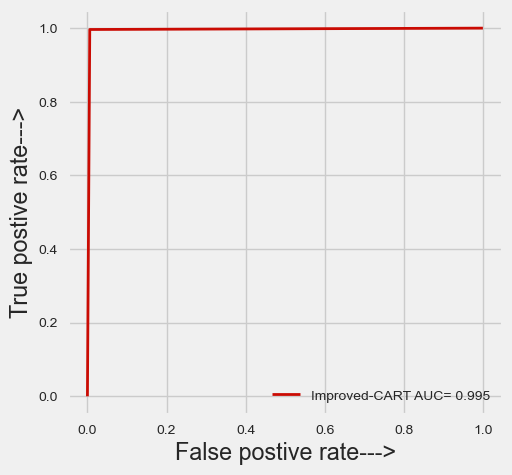

In [126]:
## AUC RUC
from sklearn.metrics import roc_curve,auc

dec_fpr,dec_tpr,threshold=roc_curve(y_test,y_pred,)
auc_dec=auc(dec_fpr,dec_tpr)

plt.figure(figsize=(5,5),dpi=100)
#plt.plot(dec_fpr,dec_tpr,linestyle='-',label='CART AUC=% 0.3f' % auc_dec)
plt.plot(dec_fpr,dec_tpr,c='r',ls='-',lw=2,ms=8,mec='navy',label='Improved-CART AUC=% 0.3f' % auc_dec)


plt.xlabel('False postive rate--->')
plt.ylabel('True postive rate--->')

plt.legend()
plt.show()


##  KMeans  بناء النموذج

In [127]:
BC_KMeansLabels=pd.read_excel('KMeansLabels.xlsx')

##  تقسيم البيانات

In [128]:

X=BC_KMeansLabels.drop(["KMeansLabels","Unnamed: 0"],axis=1)
y=BC_KMeansLabels["KMeansLabels"]  


In [129]:
X

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
0,1,60,24,100,23,0.8,3.4,10.0,20,10,...,3.87,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1
1,1,53,19,190,27,0.6,4.2,9.3,11,17,...,0.12,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4
2,1,50,19,150,15,1.1,3.5,8.5,13,10,...,1.18,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1
3,1,36,17,80,20,1.0,4.2,8.0,7,13,...,3.12,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1
4,1,30,17,80,40,0.8,3.0,9.5,9,15,...,1.25,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,4,146,28,0.7,4.0,9.5,63,23,...,1.65,3.9,5.23,11.3,288,15,254,138.7,4.35,103.6
2431,1,47,19,90,32,0.8,4.7,8.8,82,23,...,0.32,4.8,4.57,13.2,249,12,254,142.3,4.40,102.7
2432,1,43,19,70,15,0.6,3.5,8.1,22,15,...,1.12,4.4,4.32,11.1,249,8,254,137.8,4.25,110.2
2433,1,60,19,98,29,0.9,4.8,8.2,51,17,...,2.02,4.5,4.41,12.9,293,13,254,147.5,3.15,107.5


In [130]:
y

0       1
1       1
2       1
3       1
4       1
       ..
2430    1
2431    1
2432    1
2433    1
2434    1
Name: KMeansLabels, Length: 2435, dtype: int64

## بعد التحقق سنستخدم طريقة الاعتيادية لمعرفة التنبؤ وأداء النموذج

In [131]:
from sklearn.model_selection import train_test_split 

## spilt
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=101) 


In [132]:
print(X.shape)
print(y.shape)

(2435, 22)
(2435,)


In [133]:
print(X_train.shape)
print(y_train.shape)


(1826, 22)
(1826,)


In [134]:
print(X_test.shape)


(609, 22)


# تطبيق الخوارزمية

In [135]:
## شجرة القرار قبل الضبظ

In [136]:
from sklearn.tree import DecisionTreeClassifier


D_classifier= DecisionTreeClassifier(max_depth=3,min_samples_leaf=2,max_leaf_nodes=12, min_samples_split=22,random_state=10)
    
D_classifier.fit(X_train,y_train) 


DecisionTreeClassifier(max_depth=3, max_leaf_nodes=12, min_samples_leaf=2,
                       min_samples_split=22, random_state=10)

In [137]:
# تدريب الخوارزمية 

In [138]:
y_pred_train = D_classifier.predict(X_train)

print(y_pred_train)

[1 1 1 ... 0 1 1]


## طريقة 1 لايجاد الدقة مجموعة التدريب

In [139]:
train_acc =  metrics.accuracy_score(y_train, y_pred_train)
train_acc

0.9879518072289156

## نفس السابق توجد طريقتين لايجاد الدقة مجموعة الأختبار

In [140]:
y_pred_test = D_classifier.predict(X_test)

print(y_pred_test)

[1 0 1 0 1 1 0 0 0 1 1 0 0 0 1 1 1 1 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1
 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1 0
 0 1 0 0 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 0 0 1 1 1 0 0 1 1 0 1
 0 0 1 1 1 1 0 0 0 1 0 1 0 0 1 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1
 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 1 1
 0 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 1 1
 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 0 1 0 1 0 1 0 0 0 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 1 0 0 1 0 1
 1 1 0 0 1 1 1 0 0 0 1 1 0 0 1 1 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1
 0 1 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 0 1 0 0 0 0 1 0 0 0 1 1 0 1 0 1 1 1 1 0
 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 1 0
 1 1 1 0 0 1 0 0 1 1 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 0
 1 1 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 1 0 0 0 0 1
 1 1 1 0 1 0 0 0 1 1 0 1 

In [141]:
#الطريقة1
test_acc =  metrics.accuracy_score(y_test, y_pred_test)
test_acc_KMeans=test_acc
test_acc_KMeans

In [142]:
## تقرير الدقة وحساب الخطأ

In [143]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(X_test)
print('classification_report CART classifier')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report CART classifier
.......................................
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       257
           1       0.99      0.99      0.99       352

    accuracy                           0.99       609
   macro avg       0.99      0.99      0.99       609
weighted avg       0.99      0.99      0.99       609

accuracy_score= 0.9885057471264368


In [144]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.011494252873563218
mean_squared_error is = 0.10721125348377948


## AUC & RUC



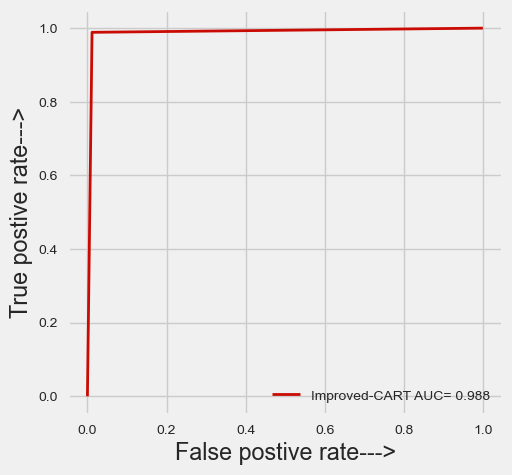

In [145]:
## AUC RUC
from sklearn.metrics import roc_curve,auc

dec_fpr,dec_tpr,threshold=roc_curve(y_test,y_pred_test)
auc_dec=auc(dec_fpr,dec_tpr)

plt.figure(figsize=(5,5),dpi=100)
#plt.plot(dec_fpr,dec_tpr,linestyle='-',label='CART AUC=% 0.3f' % auc_dec)
plt.plot(dec_fpr,dec_tpr,c='r',ls='-',lw=2,ms=8,mec='navy',label='Improved-CART AUC=% 0.3f' % auc_dec)


plt.xlabel('False postive rate--->')
plt.ylabel('True postive rate--->')

plt.legend()
plt.show()


## KMedoids بناء النموذج

In [146]:
BC_KMedoids=pd.read_excel('KMedoids.xlsx')

##  تقسيم البيانات

In [147]:

X=BC_KMedoids.drop(["KMedoids","Unnamed: 0"],axis=1)
y=BC_KMedoids["KMedoids"]  


In [148]:
X

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
0,1,60,24,100,23,0.8,3.4,10.0,20,10,...,3.87,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1
1,1,53,19,190,27,0.6,4.2,9.3,11,17,...,0.12,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4
2,1,50,19,150,15,1.1,3.5,8.5,13,10,...,1.18,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1
3,1,36,17,80,20,1.0,4.2,8.0,7,13,...,3.12,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1
4,1,30,17,80,40,0.8,3.0,9.5,9,15,...,1.25,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,4,146,28,0.7,4.0,9.5,63,23,...,1.65,3.9,5.23,11.3,288,15,254,138.7,4.35,103.6
2431,1,47,19,90,32,0.8,4.7,8.8,82,23,...,0.32,4.8,4.57,13.2,249,12,254,142.3,4.40,102.7
2432,1,43,19,70,15,0.6,3.5,8.1,22,15,...,1.12,4.4,4.32,11.1,249,8,254,137.8,4.25,110.2
2433,1,60,19,98,29,0.9,4.8,8.2,51,17,...,2.02,4.5,4.41,12.9,293,13,254,147.5,3.15,107.5


In [149]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2430    0
2431    0
2432    0
2433    0
2434    0
Name: KMedoids, Length: 2435, dtype: int64

## بعد التحقق سنستخدم طريقة الاعتيادية لمعرفة التنبؤ وأداء النموذج

In [150]:
from sklearn.model_selection import train_test_split 

## spilt
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=101) 


In [151]:
print(X.shape)
print(y.shape)

(2435, 22)
(2435,)


In [152]:
print(X_train.shape)
print(y_train.shape)


(1826, 22)
(1826,)


In [153]:
print(X_test.shape)


(609, 22)


# تطبيق الخوارزمية

In [154]:
## شجرة القرار قبل الضبظ

In [155]:
from sklearn.tree import DecisionTreeClassifier


D_classifier= DecisionTreeClassifier(max_depth=3,min_samples_leaf=2,max_leaf_nodes=12, min_samples_split=22,random_state=10)
    
D_classifier.fit(X_train,y_train) 


DecisionTreeClassifier(max_depth=3, max_leaf_nodes=12, min_samples_leaf=2,
                       min_samples_split=22, random_state=10)

In [156]:
# تدريب الخوارزمية 

In [157]:
y_pred_train = D_classifier.predict(X_train)

print(y_pred_train)

[0 0 1 ... 1 0 1]


## طريقة 1 لايجاد الدقة مجموعة التدريب

In [158]:
train_acc =  metrics.accuracy_score(y_train, y_pred_train)
train_acc

0.9830230010952903

## نفس السابق توجد طريقتين لايجاد الدقة مجموعة الأختبار

In [159]:
y_pred_test = D_classifier.predict(X_test)

print(y_pred_test)

[1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1
 0 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 1 0 1
 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 0 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 1 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0
 0 0 1 1 0 1 1 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0
 0 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 1 1 0 0 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 1
 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1
 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1
 1 0 1 0 0 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 1 1 

In [160]:
#الطريقة1
test_acc =  metrics.accuracy_score(y_test, y_pred_test)
test_acc_KMedoids= test_acc
test_acc_KMedoids

0.9704433497536946

In [161]:
## تقرير الدقة وحساب الخطأ

In [162]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(X_test)
print('classification_report CART classifier')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report CART classifier
.......................................
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       359
           1       0.96      0.96      0.96       250

    accuracy                           0.97       609
   macro avg       0.97      0.97      0.97       609
weighted avg       0.97      0.97      0.97       609

accuracy_score= 0.9704433497536946


In [163]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.029556650246305417
mean_squared_error is = 0.17192047651837583


## AUC & RUC



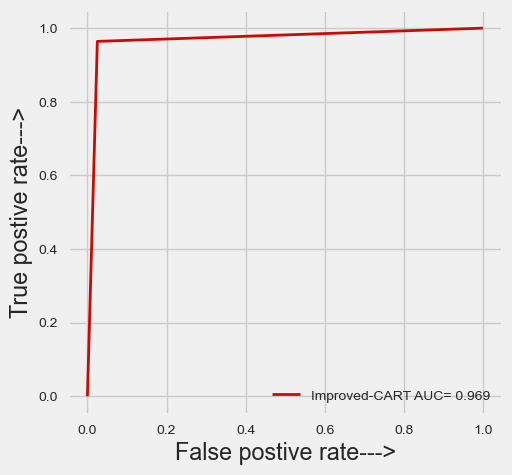

In [164]:
## AUC RUC
from sklearn.metrics import roc_curve,auc

dec_fpr,dec_tpr,threshold=roc_curve(y_test,y_pred_test)
auc_dec=auc(dec_fpr,dec_tpr)

plt.figure(figsize=(5,5),dpi=100)
#plt.plot(dec_fpr,dec_tpr,linestyle='-',label='CART AUC=% 0.3f' % auc_dec)
plt.plot(dec_fpr,dec_tpr,c='r',ls='-',lw=2,ms=8,mec='navy',label='Improved-CART AUC=% 0.3f' % auc_dec)


plt.xlabel('False postive rate--->')
plt.ylabel('True postive rate--->')

plt.legend()
plt.show()


## minibatch بناء النموذج

In [165]:
BC_minibatch=pd.read_excel('minibatch.xlsx')

##  تقسيم البيانات

In [166]:

X=BC_minibatch.drop(["minibatch","Unnamed: 0"],axis=1)
y=BC_minibatch["minibatch"]  


In [167]:
X

,Sex,Age,Adress,FBS,Urea,Creatinin,ALB,T_Ca,GPT,GOT,...,CEA,WBC,RBC,HGB,PLT,ESR,LDH,Na,K,CL
0,1,60,24,100,23,0.8,3.4,10.0,20,10,...,3.87,3.4,4.60,13.4,196,14,150,145.0,4.50,107.1
1,1,53,19,190,27,0.6,4.2,9.3,11,17,...,0.12,4.4,5.00,12.5,155,15,260,139.2,4.17,106.4
2,1,50,19,150,15,1.1,3.5,8.5,13,10,...,1.18,5.1,4.46,13.8,312,15,169,140.0,4.00,100.1
3,1,36,17,80,20,1.0,4.2,8.0,7,13,...,3.12,3.1,4.33,10.7,212,10,138,136.4,4.06,107.1
4,1,30,17,80,40,0.8,3.0,9.5,9,15,...,1.25,4.2,4.13,12.3,243,5,154,142.3,4.00,106.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2430,1,30,4,146,28,0.7,4.0,9.5,63,23,...,1.65,3.9,5.23,11.3,288,15,254,138.7,4.35,103.6
2431,1,47,19,90,32,0.8,4.7,8.8,82,23,...,0.32,4.8,4.57,13.2,249,12,254,142.3,4.40,102.7
2432,1,43,19,70,15,0.6,3.5,8.1,22,15,...,1.12,4.4,4.32,11.1,249,8,254,137.8,4.25,110.2
2433,1,60,19,98,29,0.9,4.8,8.2,51,17,...,2.02,4.5,4.41,12.9,293,13,254,147.5,3.15,107.5


In [168]:
y

0       0
1       0
2       0
3       0
4       0
       ..
2430    0
2431    0
2432    0
2433    0
2434    0
Name: minibatch, Length: 2435, dtype: int64

## بعد التحقق سنستخدم طريقة الاعتيادية لمعرفة التنبؤ وأداء النموذج

In [169]:
from sklearn.model_selection import train_test_split 

## spilt
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,stratify=y,random_state=101) 


In [170]:
print(X.shape)
print(y.shape)

(2435, 22)
(2435,)


In [171]:
print(X_train.shape)
print(y_train.shape)


(1826, 22)
(1826,)


In [172]:
print(X_test.shape)


(609, 22)


# تطبيق الخوارزمية

In [173]:
## شجرة القرار قبل الضبظ

In [174]:
from sklearn.tree import DecisionTreeClassifier


D_classifier= DecisionTreeClassifier(max_depth=3,min_samples_leaf=2,max_leaf_nodes=12, min_samples_split=22,random_state=10)
    
D_classifier.fit(X_train,y_train) 


DecisionTreeClassifier(max_depth=3, max_leaf_nodes=12, min_samples_leaf=2,
                       min_samples_split=22, random_state=10)

In [175]:
# تدريب الخوارزمية 

In [176]:
y_pred_train = D_classifier.predict(X_train)

print(y_pred_train)

[0 0 1 ... 1 0 1]


## طريقة 1 لايجاد الدقة مجموعة التدريب

In [177]:
train_acc =  metrics.accuracy_score(y_train, y_pred_train)
train_acc

0.9879518072289156

## نفس السابق توجد طريقتين لايجاد الدقة مجموعة الأختبار

In [178]:
y_pred_test = D_classifier.predict(X_test)

print(y_pred_test)

[1 1 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 1 0 1 1 1 1 1 0 1 1 0 1 0 1 0 1 0 0 1
 0 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 0 1 0 1 1 0 0
 0 1 0 1 0 0 0 1 1 0 0 1 0 1 0 1 1 0 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 0 1 0
 0 0 1 1 0 1 1 1 0 0 1 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 0
 0 1 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 1 0 0
 1 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 1
 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1
 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 1 0 0 1 0 1 0
 0 0 0 0 1 0 0 1 0 1 1 0 0 1 0 0 1 0 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 0 1
 1 0 1 0 0 1 1 0 0 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 1 1 

In [179]:
#الطريقة1
test_acc =  metrics.accuracy_score(y_test, y_pred_test)
test_acc_minibatch=test_acc

In [180]:
## تقرير الدقة وحساب الخطأ

In [181]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

y_pred=D_classifier.predict(X_test)
print('classification_report CART classifier')
print('.......................................') 

print(classification_report(y_test,y_pred)) 
print("accuracy_score=",accuracy_score(y_test,y_pred)) 


classification_report CART classifier
.......................................
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       354
           1       0.98      0.99      0.98       255

    accuracy                           0.99       609
   macro avg       0.99      0.99      0.99       609
weighted avg       0.99      0.99      0.99       609

accuracy_score= 0.986863711001642


In [182]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


MAEVale=mean_absolute_error(y_test,y_pred,multioutput="uniform_average")
print("mean_absolute_error is =",MAEVale)

MSEVale=mean_squared_error(y_test,y_pred,multioutput="uniform_average")
RmseVal=np.sqrt(MSEVale)
print("mean_squared_error is =",RmseVal)


mean_absolute_error is = 0.013136288998357963
mean_squared_error is = 0.11461365101225056


## AUC & RUC



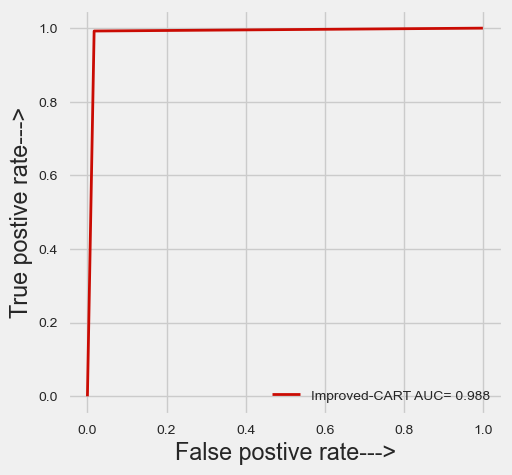

In [183]:
## AUC RUC
from sklearn.metrics import roc_curve,auc

dec_fpr,dec_tpr,threshold=roc_curve(y_test,y_pred_test)
auc_dec=auc(dec_fpr,dec_tpr)

plt.figure(figsize=(5,5),dpi=100)
#plt.plot(dec_fpr,dec_tpr,linestyle='-',label='CART AUC=% 0.3f' % auc_dec)
plt.plot(dec_fpr,dec_tpr,c='r',ls='-',lw=2,ms=8,mec='navy',label='Improved-CART AUC=% 0.3f' % auc_dec)


plt.xlabel('False postive rate--->')
plt.ylabel('True postive rate--->')

plt.legend()
plt.show()


In [189]:
df1 = pd.DataFrame({'models':['CART_kmeans',
                               'CART_KMedoids',
                               'CART_Hierarchical',
                               'CART_dbscan',
                               'CART_gaussian mixture',
                               'CART_MiniBatch' ,
                               ]
                     
                     ,'Accuracy_score':[test_acc_KMeans,
                                      test_acc_KMedoids,
                                      test_acc_Agglomerative,
                                      test_acc_DBSCAN,
                                      test_acc_GaussianMixture,
                                      test_acc_minibatch]})
df1

,models,Accuracy_score
0,CART_kmeans,0.988506
1,CART_KMedoids,0.970443
2,CART_Hierarchical,1.000000
3,CART_dbscan,0.995074
4,CART_gaussian mixture,0.995074
5,CART_MiniBatch,0.986864
